# Spotify Songs Clustering

## Table of Contents
1. [Imports](#imports)
2. [Introduction](#introduction)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Data Preprocessing](#data-preprocessing)
5. [Model Building](#model-building)
    1. [Model 1](#model-1)
    2. [Model 2](#model-2)
6. [Model Evaluation](#model-evaluation)
    1. [Model 1](#evaluation-1)
    2. [Model 2](#evaluation-2)

### Imports <a id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Introduction <a id="introduction"></a>

This notebook explores the application of clustering algorithms to the Spotify songs dataset. Clustering, a form of unsupervised learning, aims to partition a dataset into groups of similar items, where items within the same group are more similar to each other than to those in other groups. By clustering Spotify songs based on their audio features such as danceability, energy, tempo, and instrumentalness, we aim to uncover meaningful insights into the inherent structures and characteristics of the songs.

### Objectives

The objectives of this analysis are threefold:

1. **Exploratory Data Analysis (EDA)**: We will begin by exploring the Spotify songs dataset, examining the distributions of audio features, and gaining insights into the characteristics of the songs.

2. **Data Preprocessing**: We may perform feature engineering to preprocess and enhance the dataset, extracting relevant features and transforming them if necessary to better suit the clustering algorithms.

3. **Clustering Analysis**: We will apply K-means to partition the Spotify songs dataset into distinct clusters. We will evaluate the performance of each algorithm and interpret the resulting clusters to understand the underlying structures in the music collection.


### Exploratory Data Analysis <a id="exploratory-data-analysis-eda"></a>

In [3]:
df = pd.read_csv("/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")

In [4]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

The dataset contains 232,725 entries with no null values. Each song is described by features such as genre, artist name, track name, track ID, and popularity. Numerical attributes include acousticness, danceability, energy, and tempo, each ranging from 0 to 1. Categorical features include 'genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', and 'time_signature'. 'Popularity' indicates the song's popularity on Spotify. The dataset enables exploratory data analysis and insights into music trends and preferences.

In [6]:
summary_stats = df.describe()
print(summary_stats)

          popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000       

The Spotify songs dataset contains numerical features with varying scales, such as 'popularity', 'duration_ms', 'loudness', and 'tempo'. These features represent different aspects of songs and are measured on different scales, with 'popularity' ranging from 0 to 100 and 'duration_ms' representing the duration of songs in milliseconds. 'Loudness' is measured in decibels (dB), with negative values indicating quieter songs and positive values indicating louder ones. Similarly, 'tempo' represents the beats per minute (BPM) of a song, which can vary widely across genres. Due to these differences in scales, it's essential to scale or normalize the features before applying clustering algorithms or predictive models to ensure each feature contributes equally to the analysis and model training process.

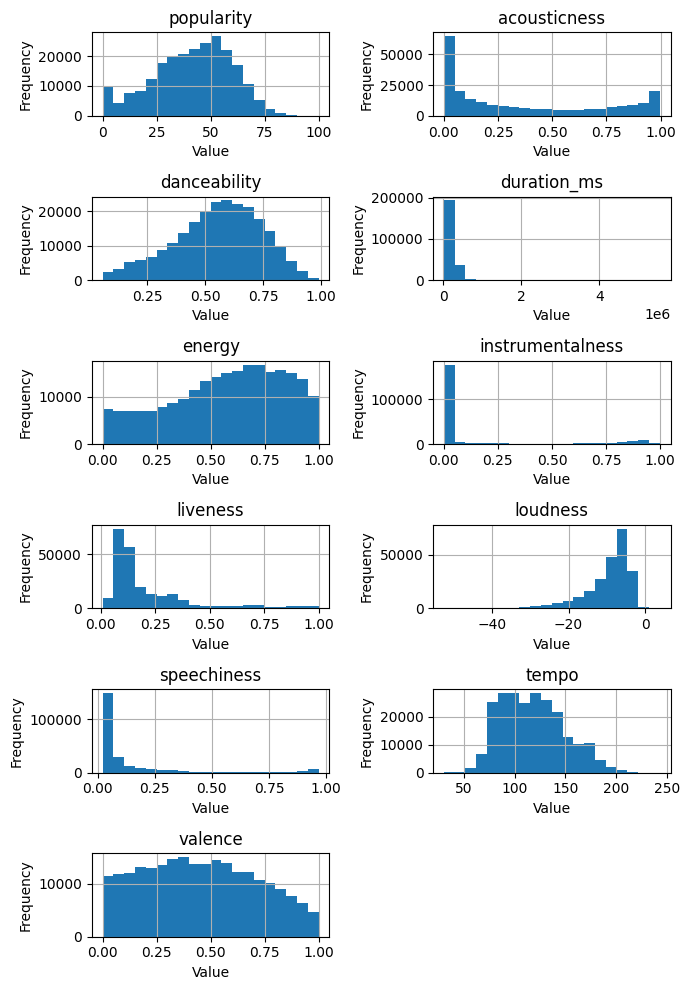

In [7]:
numerical_columns = df.select_dtypes(include='number').columns
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 10))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(ax=ax, bins=20)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
for i in range(len(numerical_columns), num_rows * num_cols):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

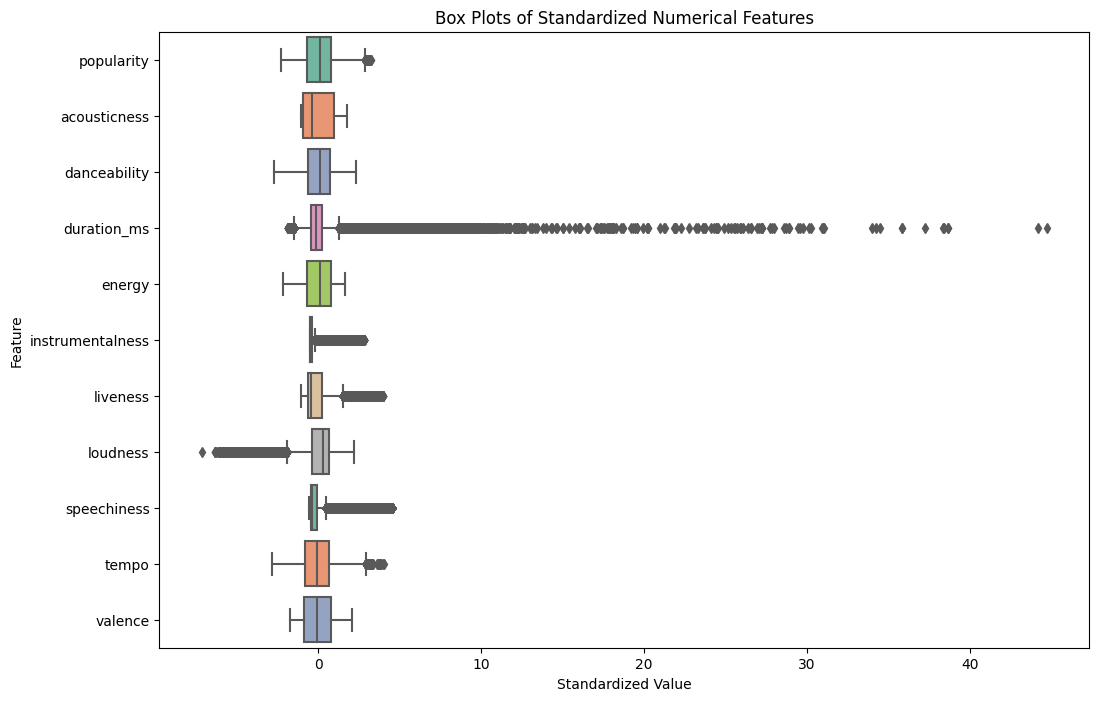

In [8]:
numerical_columns = df.select_dtypes(include='number')

# Standardize the numerical features
scaler = StandardScaler()
numerical_columns_scaled = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

# Create box plots for each standardized numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns_scaled, orient='h', palette='Set2')
plt.title('Box Plots of Standardized Numerical Features')
plt.xlabel('Standardized Value')
plt.ylabel('Feature')
plt.show()


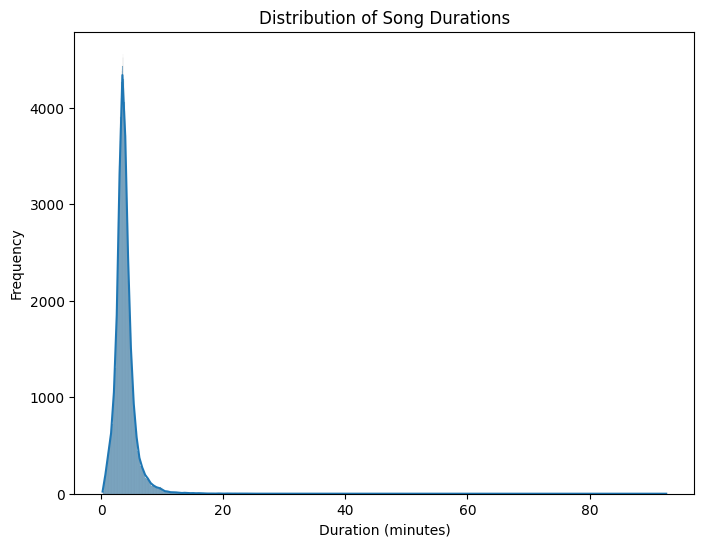

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_ms'] / (1000 * 60), kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

In [10]:
skewness = df.select_dtypes(include='number').apply(skew)
print(skewness)


popularity         -0.336388
acousticness        0.534239
danceability       -0.378276
duration_ms         9.893312
energy             -0.400221
instrumentalness    1.819755
liveness            2.074080
loudness           -1.662198
speechiness         3.311247
tempo               0.403347
valence             0.144130
dtype: float64


We can tell that we have some skewed features. Notably, 'duration_ms' displays heavy right-skewness, indicating a few songs with exceptionally long durations compared to the majority. Similarly, 'instrumentalness', 'liveness', and 'speechiness' also demonstrate pronounced right-skewness, suggesting a concentration of low values with a long tail of higher values. We shall deal with this skewness through transforming the skewed features.

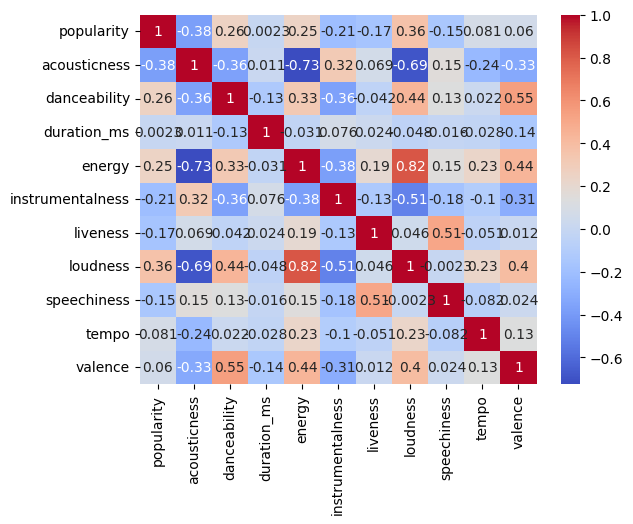

In [11]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see that there is a strong positive correlation between loudness and energy while these have a strong negative correlation with accousticness. We shall explore dropping one of these columns later on.

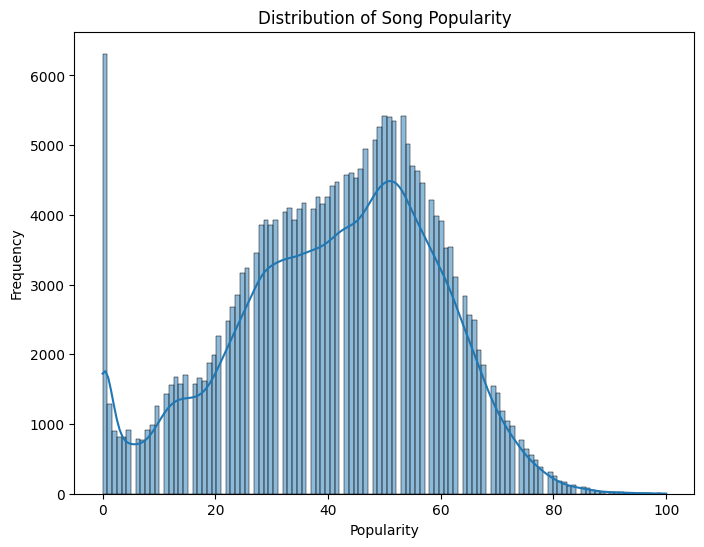

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')
plt.show()

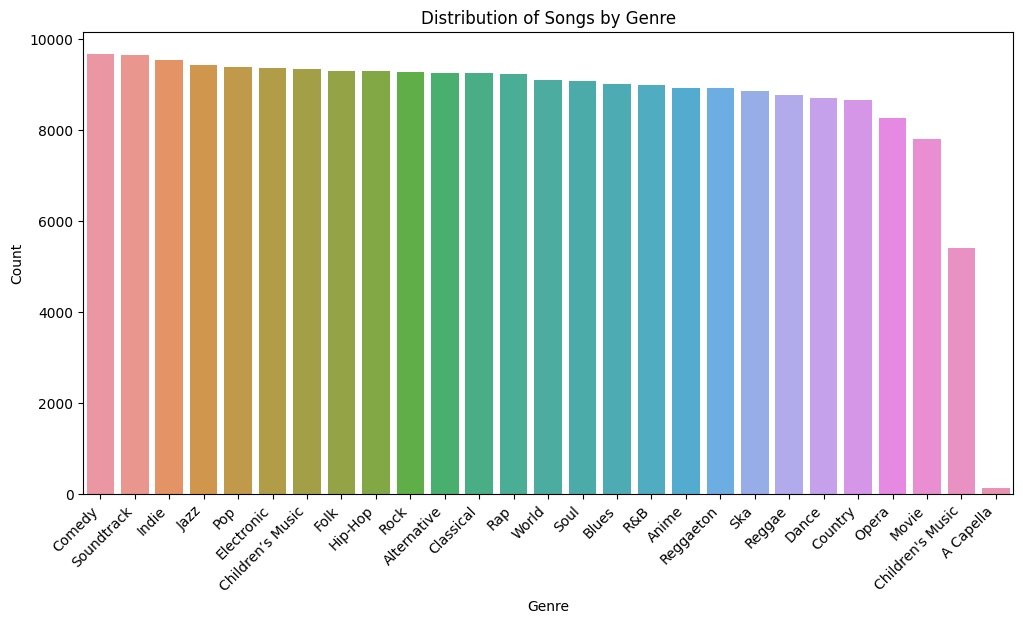

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Songs by Genre')
plt.show()

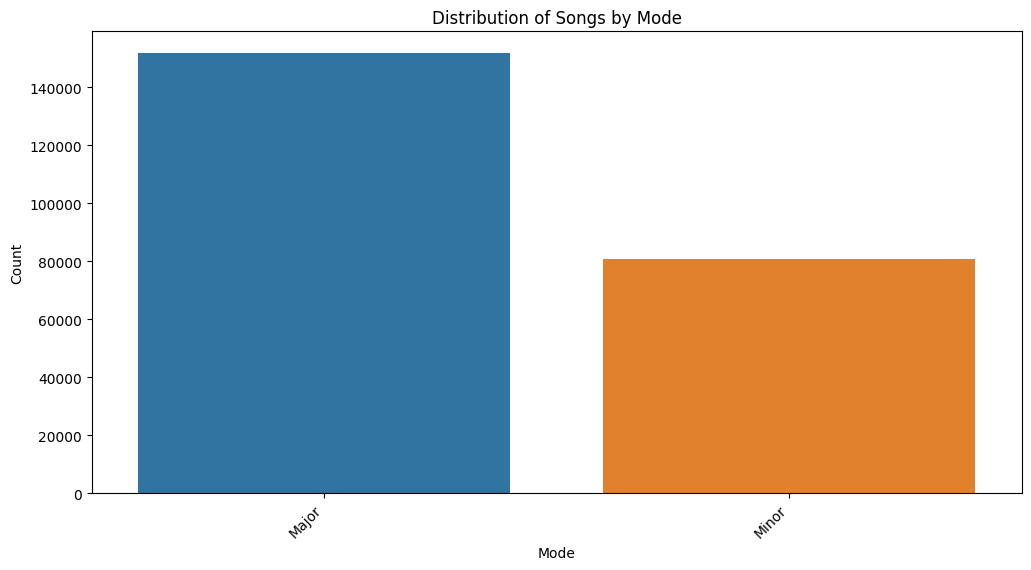

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='mode', order=df['mode'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Distribution of Songs by Mode')
plt.show()

In [15]:
inf_mask = np.isinf(df.select_dtypes(include='number'))

# Sum the number of infinity values in each column
inf_count = inf_mask.sum()

# Check if there are any columns with infinity values
if inf_count.any():
    print("The DataFrame contains infinity values in the following columns:")
    print(inf_count[inf_count > 0])
else:
    print("The DataFrame does not contain any infinity values.")


The DataFrame does not contain any infinity values.


In [16]:
# Count duplicates based on the name of the song
duplicate_count = df.duplicated(subset='track_id', keep='first').sum()

print("Number of duplicate entries based on track id:", duplicate_count)

Number of duplicate entries based on track id: 55951


In [17]:
duplicate_mask = df.duplicated(subset='track_id', keep='first')
duplicates = df[duplicate_mask]
df = df.drop_duplicates(subset='track_id', keep='first')
print("Dropped {} duplicate entries.".format(len(duplicates)))


Dropped 55951 duplicate entries.


### Data Preprocessing <a id="data-preprocessing"></a>


In [18]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

We will exclude artist names and song names from our clustering analysis to focus solely on the inherent musical characteristics of the songs. By removing these metadata attributes, we aim to identify underlying patterns and similarities based solely on musical features such as tempo, key, instrumentation, and mood. 

In [19]:
df.drop(['artist_name', 'track_name', 'track_id'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   popularity        176774 non-null  int64  
 2   acousticness      176774 non-null  float64
 3   danceability      176774 non-null  float64
 4   duration_ms       176774 non-null  int64  
 5   energy            176774 non-null  float64
 6   instrumentalness  176774 non-null  float64
 7   key               176774 non-null  object 
 8   liveness          176774 non-null  float64
 9   loudness          176774 non-null  float64
 10  mode              176774 non-null  object 
 11  speechiness       176774 non-null  float64
 12  tempo             176774 non-null  float64
 13  time_signature    176774 non-null  object 
 14  valence           176774 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 21.6+ MB


In [21]:
#df, holdout_data = train_test_split(df, test_size=0.1, random_state=42)

#### Transforming Skewed features

In [22]:
skewness = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
positive_skewed_features = skewness[skewness > 2]  # Adjust the threshold as needed

print(positive_skewed_features)

duration_ms    9.449356
speechiness    3.102435
dtype: float64


In [23]:
for feature in positive_skewed_features.index:
    df[feature] = np.log1p(df[feature])

In [24]:
negative_skewed_features = skewness[skewness < -2]  # Adjust the threshold as needed

print(negative_skewed_features)

Series([], dtype: float64)


In [25]:
skewness = df.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewness)

speechiness         2.798316
liveness            1.957001
instrumentalness    1.578600
tempo               0.406726
acousticness        0.366482
valence             0.148550
popularity         -0.130180
energy             -0.330859
danceability       -0.332170
duration_ms        -0.439308
loudness           -1.475319
dtype: float64


#### Standardization of Numerical Variables

In [26]:
numeric_cols = df.select_dtypes(include='number').columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df)

        genre  popularity  acousticness  danceability  duration_ms    energy  \
0       Movie   -2.085747      0.564740     -0.798733    -1.752675  1.279646   
1       Movie   -2.028246     -0.431708      0.257016    -1.015026  0.652467   
2       Movie   -1.913244      1.495668      0.640447    -0.526019 -1.544471   
3       Movie   -2.085747      0.815900     -1.581352    -0.778149 -0.837536   
4       Movie   -1.855743      1.490208     -1.103376    -2.173113 -1.203692   
...       ...         ...           ...           ...          ...       ...   
232716   Soul    0.156796     -0.472658      1.023878     0.085183  0.521956   
232717   Soul    0.386801     -0.819368      1.370541    -0.146059 -0.148727   
232719   Soul   -0.245712      0.441890     -0.620148    -0.897176 -0.797657   
232721   Soul    0.099295     -1.013470      1.281249     0.626916  0.456700   
232724   Soul   -0.073208     -0.837659      1.139432     0.932723 -0.315491   

        instrumentalness key  liveness 

#### Categorical Variables Encoding

In [27]:
for col in df.columns:
    if df[col].dtype == 'object':
        frequency_map = df[col].value_counts(normalize=True)
        df[col+'_encoded'] = df[col].map(frequency_map)

print(df)

        genre  popularity  acousticness  danceability  duration_ms    energy  \
0       Movie   -2.085747      0.564740     -0.798733    -1.752675  1.279646   
1       Movie   -2.028246     -0.431708      0.257016    -1.015026  0.652467   
2       Movie   -1.913244      1.495668      0.640447    -0.526019 -1.544471   
3       Movie   -2.085747      0.815900     -1.581352    -0.778149 -0.837536   
4       Movie   -1.855743      1.490208     -1.103376    -2.173113 -1.203692   
...       ...         ...           ...           ...          ...       ...   
232716   Soul    0.156796     -0.472658      1.023878     0.085183  0.521956   
232717   Soul    0.386801     -0.819368      1.370541    -0.146059 -0.148727   
232719   Soul   -0.245712      0.441890     -0.620148    -0.897176 -0.797657   
232721   Soul    0.099295     -1.013470      1.281249     0.626916  0.456700   
232724   Soul   -0.073208     -0.837659      1.139432     0.932723 -0.315491   

        instrumentalness key  liveness 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genre                   176774 non-null  object 
 1   popularity              176774 non-null  float64
 2   acousticness            176774 non-null  float64
 3   danceability            176774 non-null  float64
 4   duration_ms             176774 non-null  float64
 5   energy                  176774 non-null  float64
 6   instrumentalness        176774 non-null  float64
 7   key                     176774 non-null  object 
 8   liveness                176774 non-null  float64
 9   loudness                176774 non-null  float64
 10  mode                    176774 non-null  object 
 11  speechiness             176774 non-null  float64
 12  tempo                   176774 non-null  float64
 13  time_signature          176774 non-null  object 
 14  valence                 1

In [29]:
object_cols = df.select_dtypes(include='object').columns
df = df.drop(object_cols, axis=1)

df.info

<bound method DataFrame.info of         popularity  acousticness  danceability  duration_ms    energy  \
0        -2.085747      0.564740     -0.798733    -1.752675  1.279646   
1        -2.028246     -0.431708      0.257016    -1.015026  0.652467   
2        -1.913244      1.495668      0.640447    -0.526019 -1.544471   
3        -2.085747      0.815900     -1.581352    -0.778149 -0.837536   
4        -1.855743      1.490208     -1.103376    -2.173113 -1.203692   
...            ...           ...           ...          ...       ...   
232716    0.156796     -0.472658      1.023878     0.085183  0.521956   
232717    0.386801     -0.819368      1.370541    -0.146059 -0.148727   
232719   -0.245712      0.441890     -0.620148    -0.897176 -0.797657   
232721    0.099295     -1.013470      1.281249     0.626916  0.456700   
232724   -0.073208     -0.837659      1.139432     0.932723 -0.315491   

        instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0         

### Model Building <a id="model-building"></a>


#### Model 1 <a id="model-1"></a>

In [30]:
# Define the size of the subsample (e.g., 10% of the original dataset)
subsample_size = int(0.1 * len(df))

# Randomly select a subsample from the original dataset
subsample_df = df.sample(n=subsample_size, random_state=42)

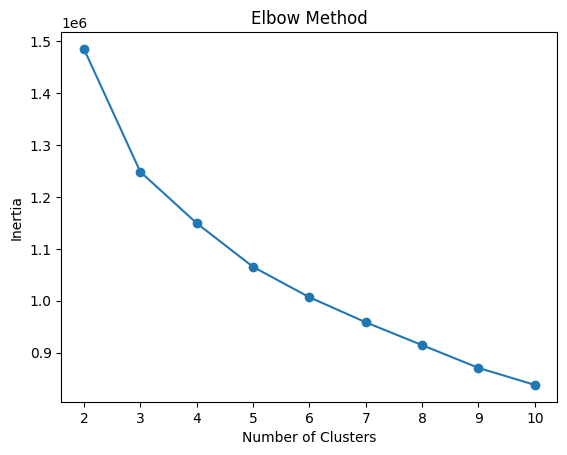

In [31]:
# Elbow Method to find optimal number of clusters
# Calculate inertia for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Initialize KMeans model with KMeans++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the model to the data
kmeans.fit(df)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

#### Model 1 Evaluation <a id="evaluation-1"></a>

In [33]:
calinski_harabasz_index = calinski_harabasz_score(df, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz_index)


Calinski-Harabasz Index: 59934.52808272397


In [34]:
davies_bouldin_score = davies_bouldin_score(df, cluster_labels)
print("Davies Bouldin Index:", davies_bouldin_score)

Davies Bouldin Index: 1.1469755719270036


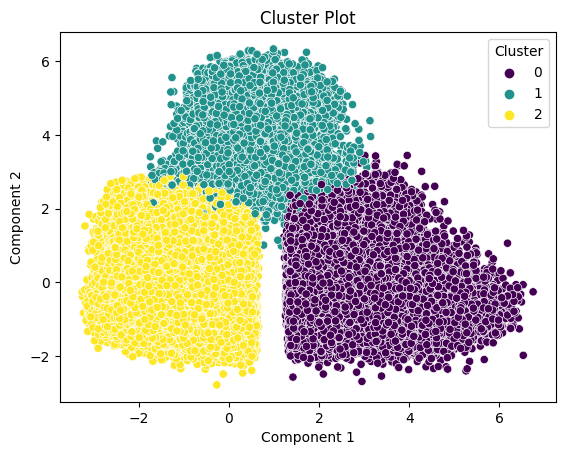

In [35]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(df)
df = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])
df['Cluster'] = cluster_labels
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
plt.title('Cluster Plot')
plt.show()


#### Model 2 - PCA then Clustering <a id="model-2"></a>

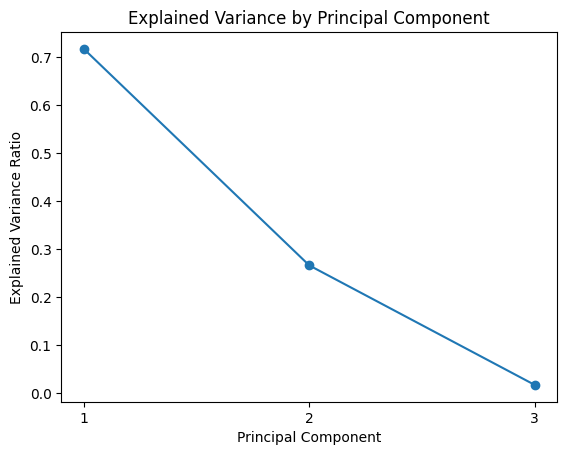

In [36]:
pca = PCA(n_components=None)  # None means keep all components

# Fit PCA to the data
pca.fit(df)

# Get the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance by each principal component
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

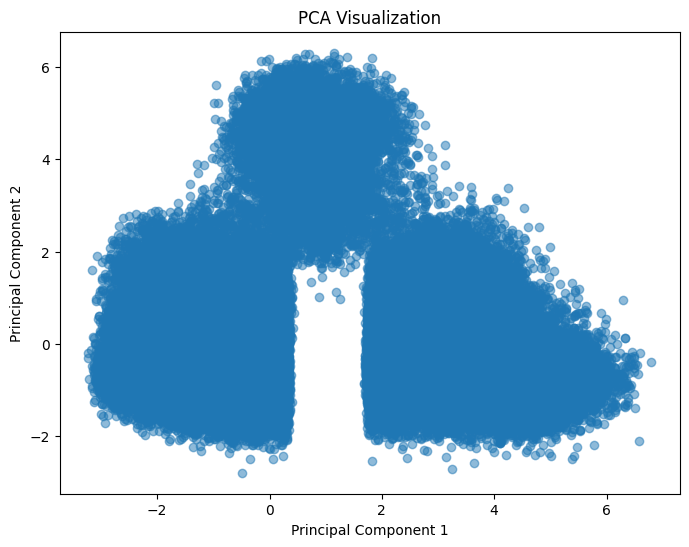

In [37]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

We can already see that we actually have 3 clusters in the dataset as found in clustering without pca in the previous step.

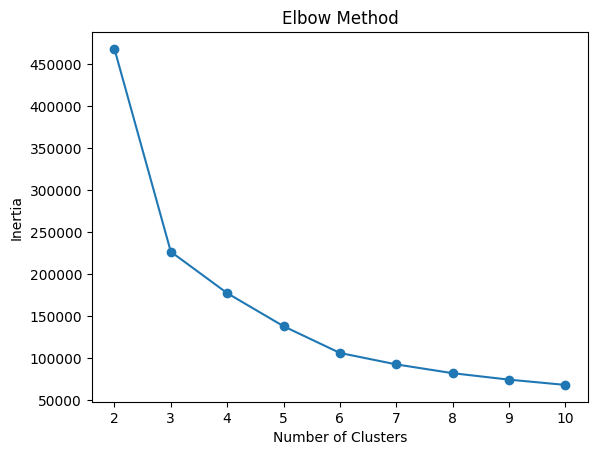

In [38]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_

#### Model 2 Evaluation <a id="evaluation-2"></a>

In [40]:
calinski_harabasz_index = calinski_harabasz_score(df_pca, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Calinski-Harabasz Index: 372948.30170868896


In [41]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(df_pca, cluster_labels)
print("Davies Bouldin Index:", davies_bouldin_score_value)

Davies Bouldin Index: 0.43947054856025924


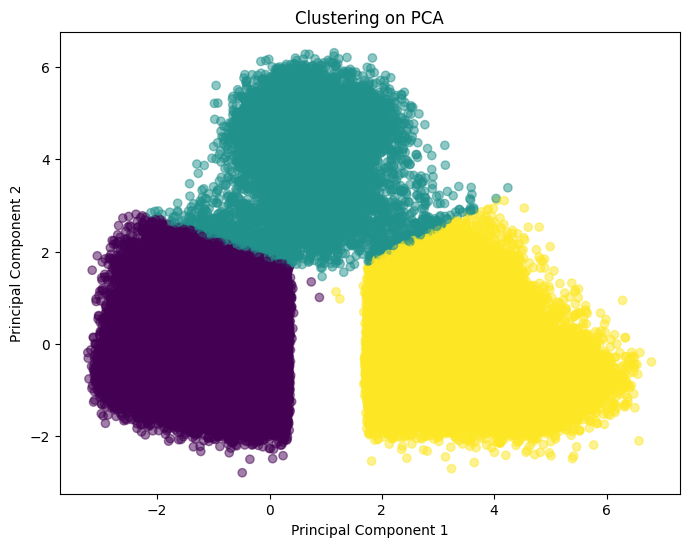

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Model 3 - DBSCAN

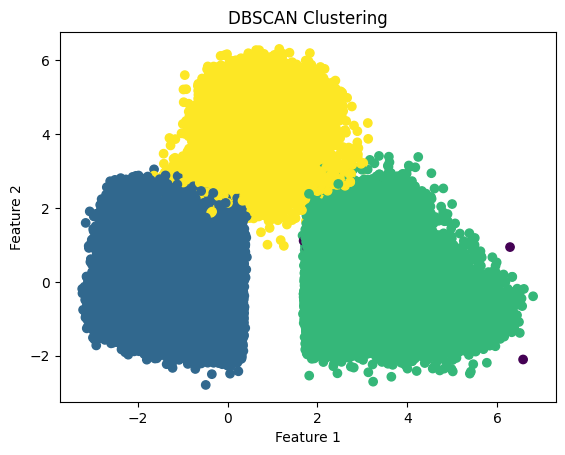

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

DBSCAN also confirmed our clustering results.